In [78]:
import pickle
with open("train_data.txt", "rb") as myFile:
    data = pickle.load(myFile)


In [79]:
header=data[0]
data=data[1:]


In [80]:
x_values=[w[0] for w in data]
y_values=[w[1] for w in data]
#z_values=[w[2] for w in data[1:]]

In [81]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

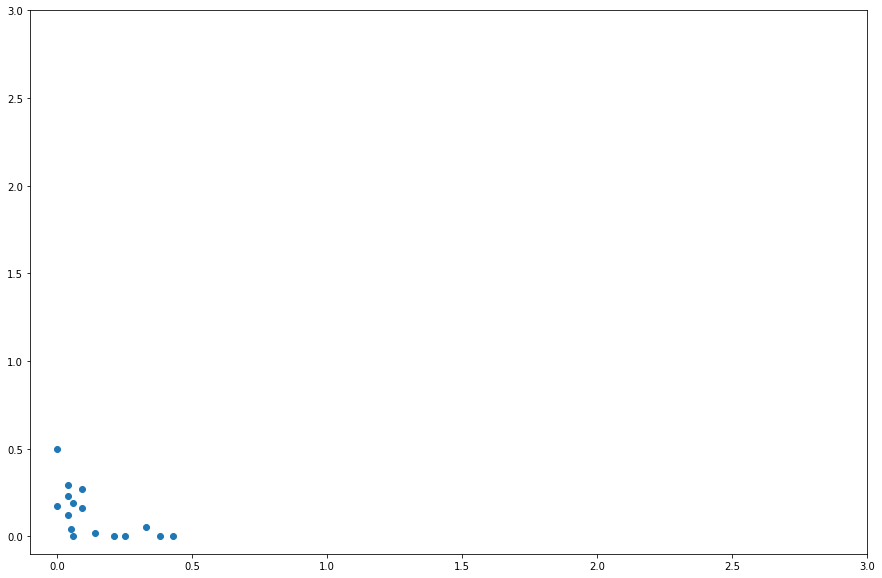

In [82]:
fig = plt.figure(figsize=(15,10))
#ax = fig
plt.xlim(-0.1,  3)
plt.ylim(-0.1, 3)
plt.scatter(x_values, y_values)

In [83]:
%matplotlib inline

data

[(0.38, 0.0),
 (0.05, 0.04),
 (0.04, 0.23),
 (0.06, 0.0),
 (0.09, 0.16),
 (0.09, 0.27),
 (0.04, 0.12),
 (0.14, 0.02),
 (0.0, 0.5),
 (0.33, 0.05),
 (0.25, 0.0),
 (0.43, 0.0),
 (0.06, 0.19),
 (0.21, 0.0),
 (0.0, 0.17),
 (0.04, 0.29)]

In [115]:
from modules import *
#from random import randint
k=3
c=[data[11],data[2],data[3]]
c_new=[]
clusters=[]    
for i in range(k):
    #c.append(None)
    c_new.append(None)
    #c[i]=data[i]
    clusters.append([])
print(c)
iteration=1
while(True):
    print("\n",iteration,":")
    for i in range(len(data)):
        pos=None
        min_dist=9999
        for j in range(k):
            dist=distance(2,c[j],data[i])
            if dist<min_dist:
                min_dist=dist
                pos=j
        clusters[pos].append(i+1)
    flag=0
    for i in range(k):
        c_new[i]=centroid(clusters[i],data)
        print(c_new[i],c[i])
        if( all(j == k for j, k in zip(c_new[i],c[i])))== False:
            flag=1
    print (clusters)
    if flag==0:
        break
    else:
        for i in range(k):
            clusters[i]=[]
            c[i]=c_new[i]

    iteration+=1
    if iteration==10:
        break



    

[(0.43, 0.0), (0.04, 0.23), (0.06, 0.0)]

 1 :
(0.3475, 0.0125) (0.43, 0.0)
(0.045, 0.24125) (0.04, 0.23)
(0.11499999999999999, 0.015) (0.06, 0.0)
[[1, 10, 11, 12], [3, 5, 6, 7, 9, 13, 15, 16], [2, 4, 8, 14]]

 2 :
(0.3475, 0.0125) (0.3475, 0.0125)
(0.045, 0.24125) (0.045, 0.24125)
(0.11499999999999999, 0.015) (0.11499999999999999, 0.015)
[[1, 10, 11, 12], [3, 5, 6, 7, 9, 13, 15, 16], [2, 4, 8, 14]]


1 0.38 0.0 #0000FF
10 0.33 0.05 #0000FF
11 0.25 0.0 #0000FF
12 0.43 0.0 #0000FF
3 0.04 0.23 #00FF00
5 0.09 0.16 #00FF00
6 0.09 0.27 #00FF00
7 0.04 0.12 #00FF00
9 0.0 0.5 #00FF00
13 0.06 0.19 #00FF00
15 0.0 0.17 #00FF00
16 0.04 0.29 #00FF00
2 0.05 0.04 #FF0066
4 0.06 0.0 #FF0066
8 0.14 0.02 #FF0066
14 0.21 0.0 #FF0066


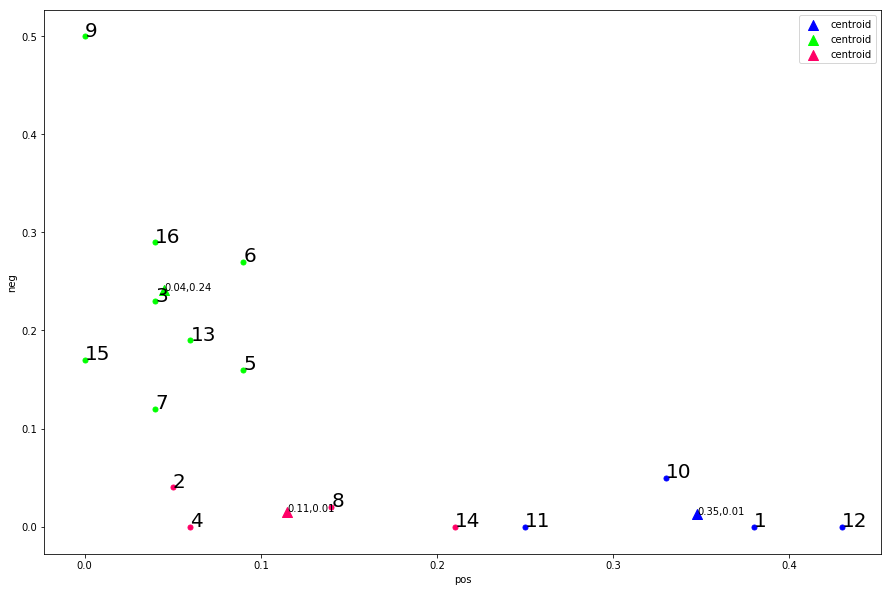

In [116]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
colors=["#0000FF", "#00FF00", "#FF0066"]
fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    #colors.append("%03x" % random.randint(0, 0xFFF))
    plt.scatter(c[i][0],c[i][1],marker="^",label="centroid",color=colors[i],s=100)
    plt.text(c[i][0],c[i][1],'%s,%s'%(round(c[i][0],2),round(c[i][1],2)),size=10)
    for j in clusters[i]:
        print(j,data[j-1][0],data[j-1][1],colors[i])
        
        plt.scatter(data[j-1][0],data[j-1][1],color=colors[i],s=25)
        plt.text(data[j-1][0],data[j-1][1],  '%s' % (str(j)), size=20, zorder=1)
plt.xlabel('pos')
plt.ylabel('neg')
plt.legend()
plt.show()


In [117]:
test_set={}
train_set={}

import csv
def reassign(i,cluster_class):
    for j in clusters[i]:
        train_set[j]=cluster_class
def label_clusters():
    accuracy=0
    
    
    with open("kmeans_test.csv") as csv_file:
        reader=csv.reader(csv_file)
        next(reader)
        for row in reader:
            test_set[int(row[0])]=row[2]
   
    g_count=b_count=n_count=0
    
    for i in range(k):
        for j in clusters[i]:
            print(j)
            if j in test_set:
                if test_set[j]=='g':
                    g_count+=1
                elif test_set[j]=='b':
                    b_count+=1
                elif test_set[j]=='n':
                    n_count+=1
        if(g_count== max(g_count,b_count,n_count)):
            reassign(i,'g')
        if(b_count== max(g_count,b_count,n_count)):
            reassign(i,'b')
       
        if(n_count== max(g_count,b_count,n_count)):
            reassign(i,'n')
                    
            
    
    print(test_set)    
    print(train_set)

label_clusters()

1
10
11
12
3
5
6
7
9
13
15
16
2
4
8
14
{1: 'g', 2: 'n', 3: 'b', 4: 'n', 5: 'n', 6: 'n', 7: 'b', 8: 'g', 9: 'b', 10: 'g'}
{1: 'g', 10: 'g', 11: 'g', 12: 'g', 3: 'b', 5: 'b', 6: 'b', 7: 'b', 9: 'b', 13: 'b', 15: 'b', 16: 'b', 2: 'n', 4: 'n', 8: 'n', 14: 'n'}


In [118]:
def accuracy():
    total=len(test_set)
    correct=0
    for i in train_set:
        if i in test_set and train_set[i]==test_set[i]:
            correct+=1
    print(float(correct/total)*100,'%')
accuracy()

70.0 %


In [114]:

headers=[header for header in header]
headers.append('class')
print(headers)
with open ("rulebase.csv","w") as csv_file:
    writer=csv.writer(csv_file)
    writer.writerow(headers)
    for i in train_set:
        row=[]
     
        for value in data[i-1]:
            row.append(value)
        row.append(train_set[i])
        writer.writerow(row)

['pos_score', 'neg_score', 'class']


In [77]:
def something():
    print("yes")